In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
path='gdrive/My Drive/DATASCIENCE/THML/Lab_5'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Clustering animals with attributes

In this notebook, we'll get a feel for clustering by applying <font color="magenta">**k-means**</font> and <font color="magenta">**average linkage**</font> to cluster a collection of animals.

The data set we'll work with is called `Animals with Attributes`. It contains information about 50 animals. For each, it has 85 real-valued features that capture various properties of the animal: where it lives, what it eats, and so on. You can download the data set from:

http://attributes.kyb.tuebingen.mpg.de

(Under "Downloads", choose the "base package".) Make sure the files `'classes.txt'` and `'predicate-matrix-continuous.txt'` are in the same directory as this notebook before you begin.

## 1. Load in the data set

Standard includes as well as some modules for k-means and hierarchical clustering.

In [0]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os

import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans

Load in the data set. The file `'classes.txt'` contains the names of the 50 animals. The file `'predicate-matrix-continuous.txt'` contains the data itself: 85 attributes per animal.

---



In [0]:
#
# Load in animal names
#
file_to_open = path + "/classes.txt"
f = open(file_to_open, "rt", encoding="utf-8")
lines = f.readlines()
names = []
for line in lines:
    names.append(" ".join(line.split()[1:]))
f.close()
#
# Load attribute matrix
#
x = np.loadtxt(path+'/predicate-matrix-continuous.txt')
x


array([[-1.  , -1.  , -1.  , ...,  2.35,  9.7 ,  8.38],
       [39.25,  1.39,  0.  , ..., 58.64, 20.14, 11.39],
       [83.4 , 64.79,  0.  , ..., 15.77, 13.41, 15.42],
       ...,
       [63.57, 43.1 ,  0.  , ..., 35.95, 28.26,  5.  ],
       [55.31, 55.46,  0.  , ...,  5.04, 18.89, 72.99],
       [10.22, 21.53, 27.73, ...,  3.96, 14.05, 37.98]])

## 2. K-means clustering

We now run Lloyd's algorithm to obtain a flat clustering of the data. In the code below, we ask for k=15 clusters, but you should experiment with other choices.

We ask for random initialization, which means that different runs of the algorithm will potentially have different outcomes. It is worth running the algorithm several times to see how the results change.

- Ta dùng phương pháp Eblow để  có cơ sở xác định số nhóm cần cluster ra là bao nhiêu, ta tạm chọn số k = 15 như trong bài:

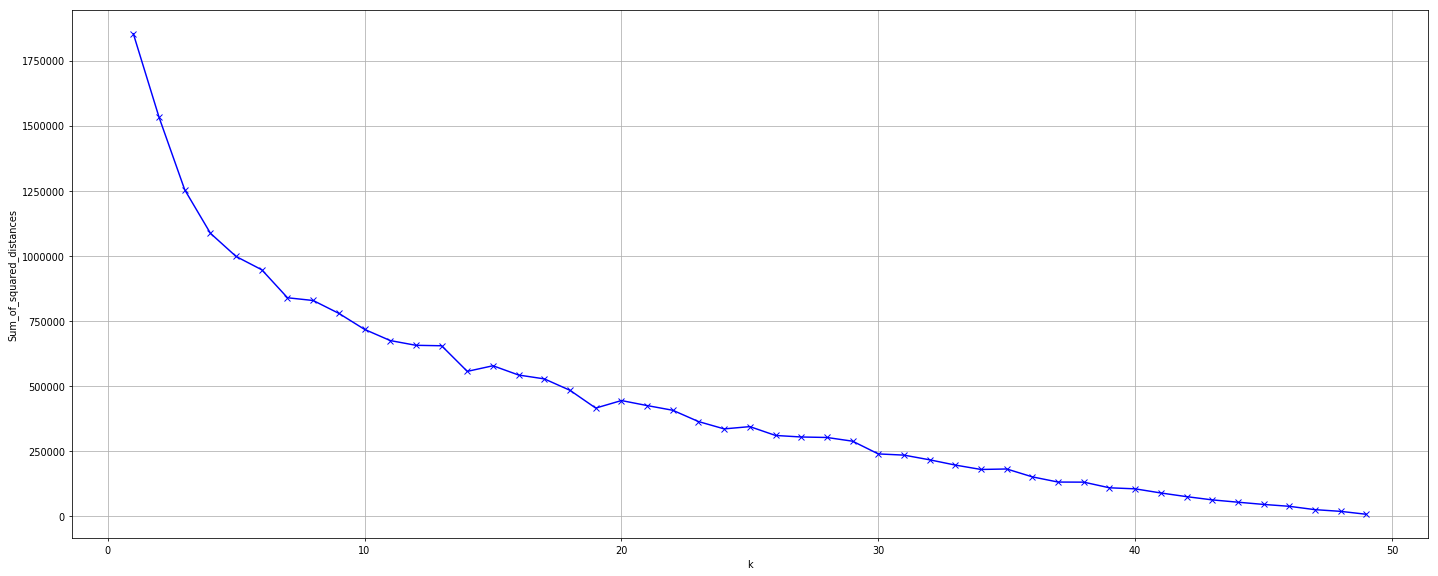

In [0]:
Sum_of_squared_distances = []
K = range(1,50)
for k in K:
    km = KMeans(n_clusters=k,init='random')
    km = km.fit(x)
    Sum_of_squared_distances.append(km.inertia_)
plt.figure(figsize=(25,10), dpi=70)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.grid()
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.show()

In [0]:
#
# Run Lloyd's algorithm
#
k = 15 # number of clusters
kmeans = KMeans(n_clusters=k, init='random')
kmeans.fit(x)
# Get a list of the animals in each cluster
clusters = []
for j in range(0,k):
    clusters.append([])
for i in range(0,50):
    clusters[kmeans.labels_[i]].append(names[i])
#
# Print out clusters
#
for j in range(0,k):
    print('Nhóm ' + str(j+1), clusters[j])
print(Sum_of_squared_distances[k])

Nhóm 1 ['hải cẩu', 'rái cá', 'hải mã']
Nhóm 2 ['chó đốm', 'chó Đức', 'chó Chihuahua', 'chó Collie']
Nhóm 3 ['gấu xám', 'gấu Bắc cực']
Nhóm 4 ['báo', 'chó sói', 'linh miêu', 'sư tử']
Nhóm 5 ['ngựa', 'ngựa vằn']
Nhóm 6 ['chồn hôi', 'hamster', 'sóc', 'thỏ', 'chuột (nhỏ)']
Nhóm 7 ['bò đực', 'cừu', 'trâu', 'gấu trúc', 'heo', 'bò cái']
Nhóm 8 ['hà mã', 'voi', 'tê giác']
Nhóm 9 ['cá voi sát thủ', 'cá voi xanh', 'cá voi lưng gù', 'cá heo']
Nhóm 10 ['hải ly', 'chuột chủi', 'cáo', 'chuột (lớn)', 'chồn', 'gấu mèo']
Nhóm 11 ['mèo Ba Tư', 'mèo Xiêm']
Nhóm 12 ['khỉ nhện', 'gorilla', 'tinh tinh']
Nhóm 13 ['dơi']
Nhóm 14 ['linh dương', 'nai sừng tấm', 'hưu cao cổ', 'nai']
Nhóm 15 ['hổ']
540169.8539935715


Sau khi chạy lại nhiều ta, ta chọn kết quả sau:

---


- Nhóm 1 ['hải cẩu', **'rái cá'**, 'hải mã'] - Động vật sống ở môi trường lạnh
- Nhóm 2 ['chó đốm', 'chó Đức', 'chó Chihuahua', 'chó Collie'] - Động vật thuộc lớp chó
- Nhóm 3 ['gấu xám', 'gấu Bắc cực'] - Động vật thuộc nhóm Gấu
- Nhóm 4 ['báo', **'chó sói'**, 'linh miêu', 'sư tử'] - Động vật thuộc họ Mèo
- Nhóm 5 ['ngựa', 'ngựa vằn'] - Động vật thuộc họ Ngựa
- Nhóm 6 [**'chồn hôi'**, 'hamster', 'sóc', 'thỏ', 'chuột (nhỏ)'] - Động vật thuộc bộ gặm nhắm
- Nhóm 7 ['bò đực', 'cừu', 'trâu', **'gấu trúc', 'heo'**, 'bò cái'] - Bộ guốc chẵn - ăn thực vật
- Nhóm 8 ['hà mã',** 'voi'**, 'tê giác'] -Bộ guốc lẻ
- Nhóm 9 ['cá voi sát thủ', 'cá voi xanh', 'cá voi lưng gù', 'cá heo'] - Động vật thuộc bộ cá heo
- Nhóm 10 [**'hải ly', 'chuột chủi'**, 'cáo', 'chuột (lớn)', 'chồn', 'gấu mèo'] - Động vật ăn thịt
- Nhóm 11 ['mèo Ba Tư', 'mèo Xiêm'] - Động vật thuộc giống Mèo nuôi
- Nhóm 12 ['khỉ nhện', 'gorilla', 'tinh tinh'] - Động vật thuộc bộ linh trưởng
- Nhóm 13 ['dơi'] - bộ dơi
- Nhóm 14 ['linh dương', 'nai sừng tấm', 'hưu cao cổ', 'nai'] - bộ guốc chẵn
- Nhóm 15 ['hổ'] - Động vật ăn thịt


---

In đậm là những điểm bất thường



## 3. Hierarchical clustering

We use the built-in hierarchical clustering module of `scipy` to apply Ward's method to our data. The resulting tree is often called a *dendrogram*, and the module also has a routine that can display one of these.

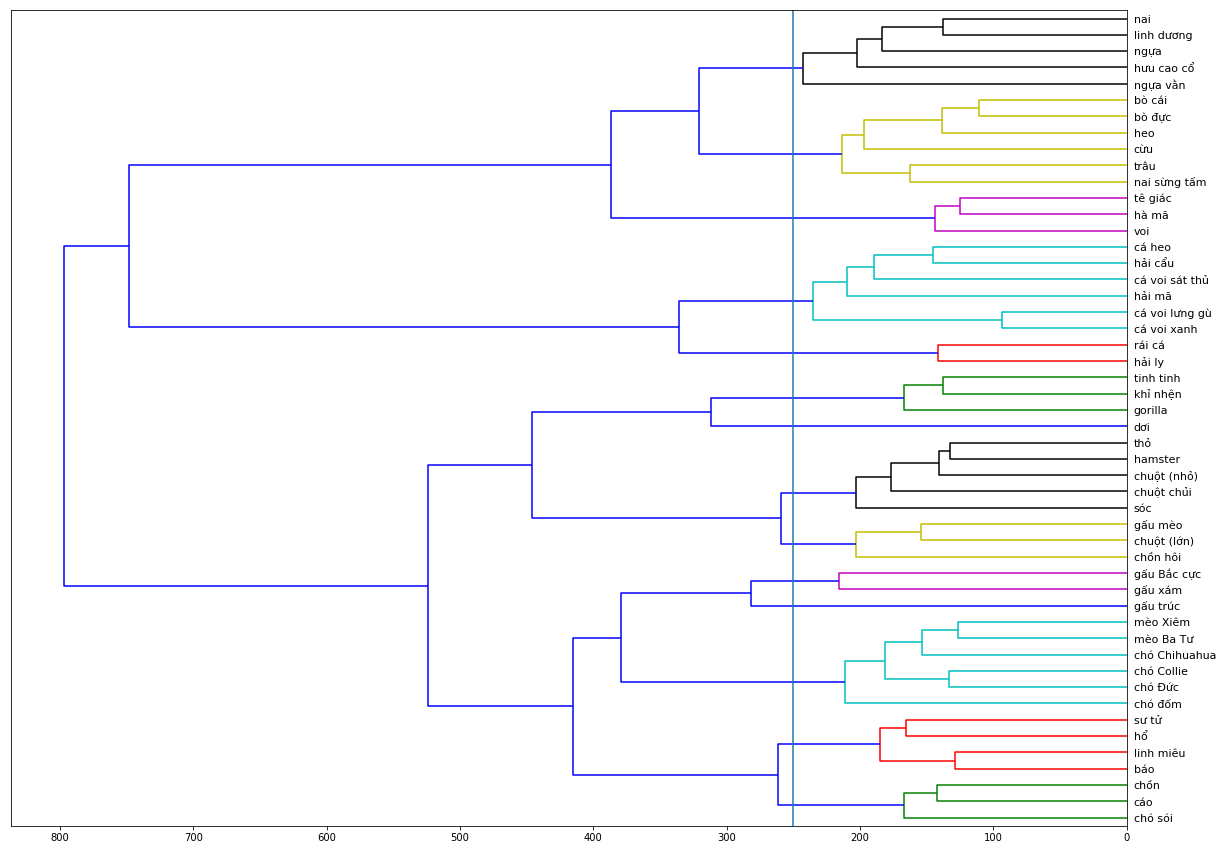

In [0]:
#
# Adjust figure size to accommodate the full tree
#
from pylab import rcParams

rcParams['figure.figsize'] = 20, 15
#
# Do hierarchical clustering using Ward's method
#
z = sch.linkage(x, method='ward')
#
# Display dendrogram
#
info = sch.dendrogram(z, orientation='left',color_threshold=250, labels=names, leaf_font_size=11)
plt.axvline(x=250)

plt.show()

Ta có thể gom thành 14 nhóm ( 1 nhóm là 1 màu)
- Nhóm 1: [Nai, Linh dương, Ngựa, Hươu cao cổ, Ngựa vằn] - *Động vật bộ móng guốc *
- Nhóm 3: [  'bò cái', 'bò đực', 'heo', 'cừu', 'trâu', 'nai sừng tấm'] - *Động vật bộ móng guốc*
- Nhóm 4: ['tê giác', 'hà mã', 'voi'] - Động vật sắp nguy cấp hay nguy cấp
- Nhóm 5: ['cá voi sát thủ', 'cá voi xanh', 'cá voi lưng gù', 'hải mã', 'cá heo', 'hải cẩu'] - *Động vật có vú dưới nước*
- Nhóm 6: ['rái cá', 'hải ly'] - *Động vật có vú ăn thịt sống được trên cạn hoặc dưới nước*
- Nhóm 7: ['tinh tinh', 'khỉ nhện', 'gorilla'] - *Động vật thuộc bộ linh trưởng*
- Nhóm 8: ['dơi']- *Động vật thuộc bộ dơi*
- Nhóm 9: ['chuột chủi', 'hamster', 'sóc', 'thỏ', 'chuột (nhỏ)'] -  *Động vật thuộc bộ gặm nhắm*
- Nhóm 10: ['chồn hôi', 'chuột (lớn)', 'gấu mèo']  - *Không xác định*
- Nhóm 11: ['Gấu bắc cực', 'Gấu xám'] -* Động vật thuộc họ Gấu*
- Nhóm 12: ['Gấu trúc'] -* Động vật thuộc họ Gấu (nhưng chi khác với họ Gấu bình thường)*
- Nhóm 13:  ['chó đốm', 'mèo Ba Tư', 'chó Đức', 'mèo Xiêm', 'chó Chihuahua', 'chó Collie'] -* Động vật nuôi trong nhà *
- Nhóm 14: ['sư tử','hổ', 'linh miêu', 'báo'] - *Động vật có vú ăn thịt*
- Nhóm 15: ['chồn', 'cáo', 'chó sói'] - *Động vật có vú ăn thịt thuộc họ Chó*

## 4. Questions

1. What initialization method was used for k-means in the notebook?

     Trong bài này k-means đuợc khởi tạo init='random' - khởi tạo bất kỳ từ 1 observation(1 dòng) trong tập dataset của mình để làm centroids, nên mõi lần chạy tã sẽ được các kết quả khác nhau

2. Based on your experiences with -means, which of the following statements seems the most accurate?
    
   ** a) In general, the k-means cost function has multiple local optima**
    
    b) The algorithm does not necessarily find a local optimum of the k-means cost function
    
    c) The algorithm finds the global optimum of the k-means cost function.
    
3. Does it make sense to run Ward's hierarchical clustering algorithm several times on the same data set?

    **a) No, because it returns the same result every time**
    
    b) Yes, because it may return different results every time and we can choose the best of them
    
    c) Yes, because it always returns different results, and we can combine them into a single good hierarchy
    

---

Câu 2 và 3 phần in đậm là phần trả lời